In [2]:
import os
import io
from google.cloud import vision
from PIL import Image
import matplotlib.pyplot as plt
import cv2

In [3]:
# Authenticate user
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="gleaming-store-318714-fa3a393f498e.json"

In [4]:
client = vision.ImageAnnotatorClient()

In [29]:
path = './images/road_board.jpg'
with io.open(path, 'rb') as image_file:
    content = image_file.read()

image = vision.Image(content=content)

In [30]:
# Read image
height, width, channels = cv2.imread(path).shape

In [31]:
response = client.text_detection(image=image)

In [32]:
bboxes = []


texts = response.text_annotations
print('Texts:')

for text in texts:
#     print('\n"{}"'.format(text.description))

#     vertices = (['({},{})'.format(vertex.x, vertex.y)
#                 for vertex in text.bounding_poly.vertices])
    bbox = []
    for idx, vertex in enumerate(text.bounding_poly.vertices):
        
        if idx%2 == 0:
            bbox.append((int(vertex.x), int(vertex.y)))
#             print(' - ({}, {})'.format(int(vertex.x), int(vertex.y)))
    
    data = {}
    data['text'] = text.description
    data['bbox'] = bbox
    bboxes.append(data)

# print('Number of objects found: {}'.format(len(objects)))
# for object_ in objects:
#     print('\n{} (confidence: {})'.format(object_.name, object_.score))
#     print('Normalized bounding polygon vertices: ')
#     bbox = []
#     for idx, vertex in enumerate(object_.bounding_poly.normalized_vertices):
        
#         if idx%2 == 0:
#             bbox.append((int(vertex.x*width), int(vertex.y*height)))
#             print(' - ({}, {})'.format(int(vertex.x*width), int(vertex.y*height)))
    
#     data = {}
#     data['name'] = object_.name
#     data['bbox'] = bbox
#     bboxes.append(data)

Texts:


In [33]:
# bboxes[1:]

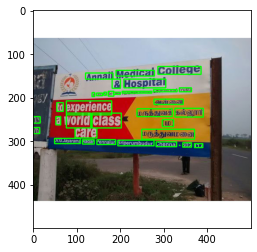

In [34]:
# Read image
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Draw 
start_point = (158, 593)
end_point = (287, 748)

# Blue color in RGB
color = (0, 255, 0)
  
# Line thickness of 2 px
thickness = 2


# font
font = cv2.FONT_HERSHEY_SIMPLEX

# fontScale
fontScale = 1
   

# Line thickness of 2 px
# thickness = 2
   


for bbox in bboxes[1:]:
    start_point = bbox['bbox'][0]
    end_point = bbox['bbox'][1]
    image = cv2.rectangle(image, start_point, end_point, color, thickness)
    
#     image = cv2.putText(image, bbox['name'], start_point, font, 
#                    fontScale, color, thickness, cv2.LINE_AA)

plt.imshow(image)

In [35]:
print(bboxes[0]['text'])

Annaii Medical College
& Hospital
(A Unit of Sri Devi Karumariamman Educational Trust)
அன்னை
to experience
a world class
care
மருத்துவக் கல்லூரி
(D)
மருத்துவமனை
0%
76.
Dr.G.Jayarama Nagar, Pennalur, Sriperumbudur, Chennai - 602 117

